In [16]:
!pip install wordcloud==1.8.1

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import string


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Dropout, Input, SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

import seaborn as sns
import sys
import warnings 
warnings.filterwarnings("ignore")

from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
import warnings 
warnings.filterwarnings("ignore")


import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Import the data

In [20]:
raw_data = pd.read_csv("Data_Gp4.csv", sep = ";", encoding="ISO 8859-1")
print("Data points count: ", raw_data['id'].count())
raw_data.head()

Data points count:  6000


,id,is_misinfo,Texts
0,"1,3469E+18",0,#VaccinesWork #CovidVaccine First responders r...
1,"1,34662E+18",0,If you use to eat food from the Dixie chicken ...
2,"1,34557E+18",1,It's absolutely terrifying that I could just h...
3,"1,34422E+18",1,This compulsory vaccination will eventually le...
4,"1,34479E+18",0,i really doubt 2021 will be much different imo...


## 2. Data Pre-processing

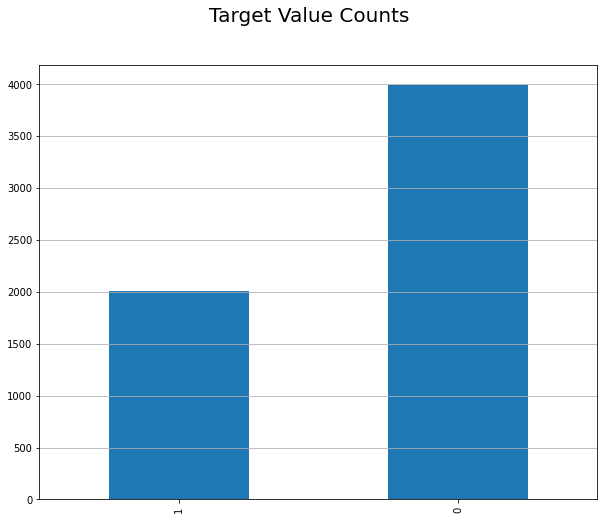

In [21]:
# Plotting target value counts

# 1 = misinformation
# 0 = no misinformation

plt.figure(figsize=(10,8))
ax = raw_data['is_misinfo'].value_counts().sort_values().plot(kind="bar")
ax.grid(axis="y")
plt.suptitle("Target Value Counts", fontsize=20)
plt.show()

In [22]:
# WANT TO REPLACE. SEE NEXT CELL. DUE TO UNCOMPLETENESS.

# def clean_text(text):
    
#     text = str(text).lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
    
#     text = re.sub('[0-9]{5,}', '#####', text)
#     text = re.sub('[0-9]{4}', '####', text)
#     text = re.sub('[0-9]{3}', '###', text)
#     text = re.sub('[0-9]{2}', '##', text)

#     return text

# raw_data["clean_text"] = raw_data["Texts"].apply(lambda x: clean_text(x))
# raw_data.head()

In [23]:
!pip install nlpaug

In [24]:
import nltk
nltk.download('punkt')
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action
from tqdm import tqdm
import nlpaug.augmenter.word as naw
from nlpaug.util.file.download import DownloadUtil

DownloadUtil.download_word2vec(dest_dir='.') # word2vec
DownloadUtil.download_glove(model_name='glove.6B', dest_dir='.') # GloVe
DownloadUtil.download_fasttext(model_name='wiki-news-300d-1M', dest_dir='.') # fasttext model
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# Word Augmenter
import nlpaug.augmenter.word as naw

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
print(len(raw_data))
x = len(raw_data)
aug = naw.SynonymAug(aug_src='wordnet')
for i, text in enumerate(raw_data.Texts[raw_data.is_misinfo==1]):
  augmented_text = aug.augment(text,3)
  for i in augmented_text:
    x=x+1
    new_row = {'id':x, 'Texts':i,'is_misinfo':1}
    raw_data = raw_data.append(new_row, ignore_index=True)

len(raw_data)

6000


12027

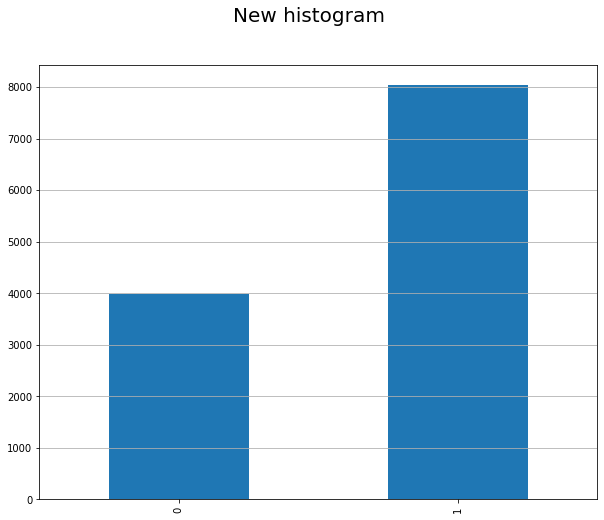

In [27]:
plt.figure(figsize=(10,8))
ax = raw_data['is_misinfo'].value_counts().sort_values().plot(kind="bar")
ax.grid(axis="y")
plt.suptitle("New histogram", fontsize=20)
plt.show()

In [28]:
# Clean Texts
stemmer = SnowballStemmer('english')

def clean_text(each_text):

    # remove URL from text
    each_text_no_url = re.sub(r"http\S+", "", each_text)
    
    # remove numbers from text
    text_no_num = re.sub(r'\d+', '', each_text_no_url)

    # tokenize each text
    word_tokens = word_tokenize(text_no_num)
    
    # remove sptial character
    clean_text = []
    for word in word_tokens:
        clean_text.append("".join([e for e in word if e.isalnum()]))

    # remove lower
    clean_text_lowered = [w.lower() for w in clean_text]  

    # do stemming
    stemmed_text = [stemmer.stem(w) for w in clean_text_lowered]
    
    return " ".join(" ".join(stemmed_text).split())


raw_data['clean_text'] = raw_data['Texts'].apply(lambda x: clean_text(x) )

In [29]:
# WHAT IS THIS HERE ?????
# x=raw_data[raw_data.is_misinfo==0]
# x.Texts[0]

## 3. Tokenization

In [30]:
# INSERT TOKENIZATION HERE

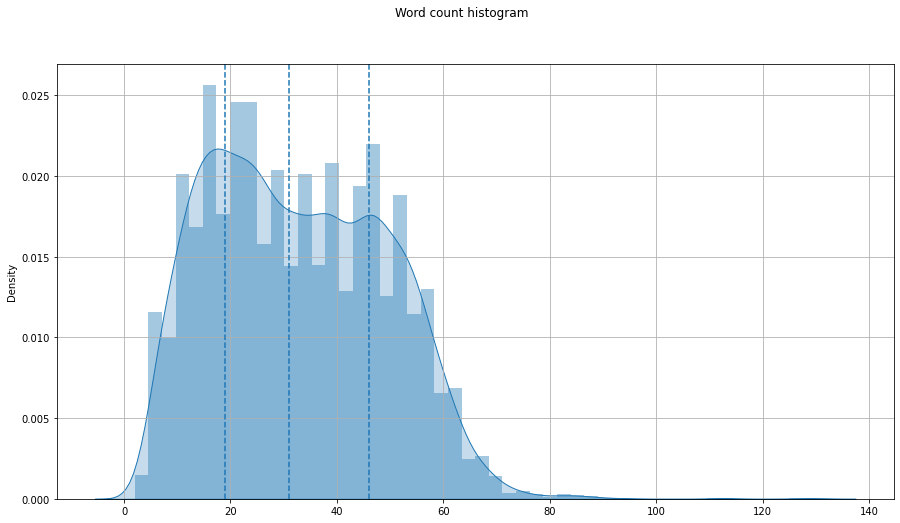

In [31]:
plt.figure(figsize=(15,8))
raw_data['word_count'] = raw_data['Texts'].apply(lambda x: len(x.split(" ")) )
sns.distplot(raw_data['word_count'].values, hist=True, kde=True, kde_kws={"shade": True})
plt.axvline(raw_data['word_count'].describe()['25%'], ls="--")
plt.axvline(raw_data['word_count'].describe()['50%'], ls="--")
plt.axvline(raw_data['word_count'].describe()['75%'], ls="--")

plt.grid()
plt.suptitle("Word count histogram")
plt.show()

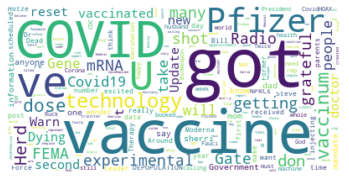

In [32]:
text = " ".join(cat.split()[1] for cat in raw_data.Texts)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

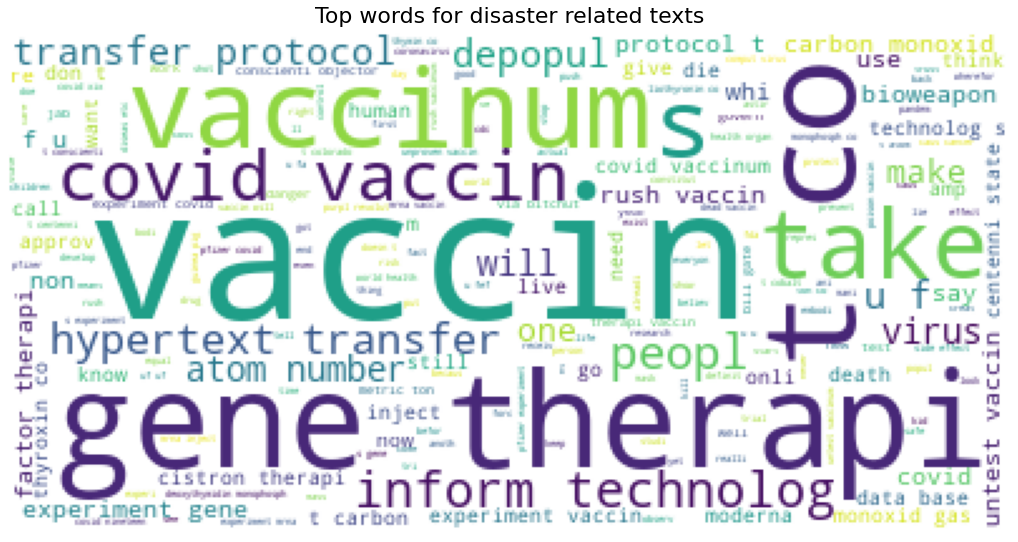

In [33]:
#Top words for misinformation related news
wc = WordCloud(
    background_color='white', 
    max_words=200, 
    )
wc.generate(' '.join(text for text in raw_data.loc[raw_data['is_misinfo'] == 1, 'clean_text']))
plt.figure(figsize=(18,10))
plt.title('Top words for disaster related texts', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

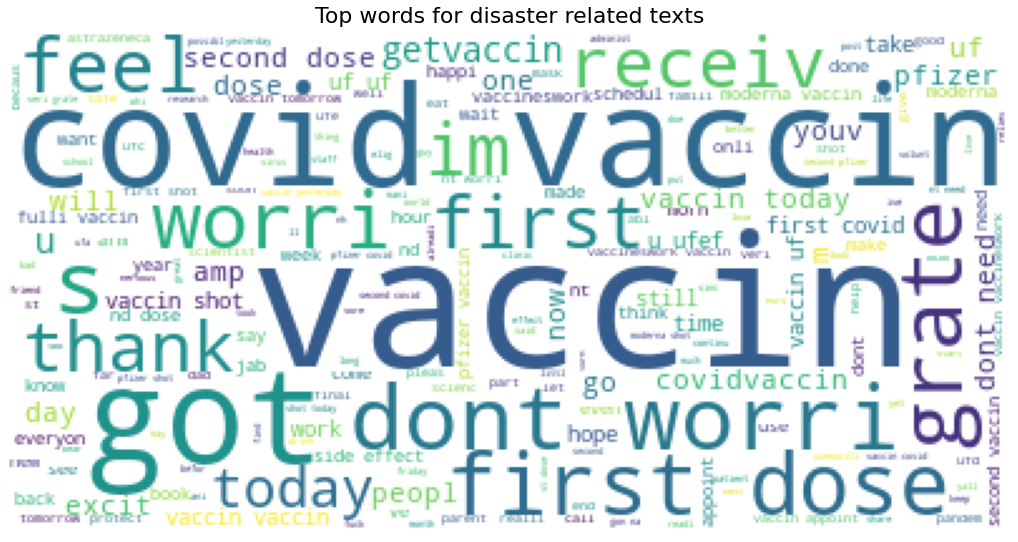

In [34]:
#Top words for vaccine related news
wc = WordCloud(
    background_color='white', 
    max_words=200, 
    )
wc.generate(' '.join(text for text in raw_data.loc[raw_data['is_misinfo'] == 0 , 'clean_text']))
plt.figure(figsize=(18,10))
plt.title('Top words for disaster related texts', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

# 4. Feature construction

## 4.1. Handle (=count)&nbsp;emojis,&nbsp;urls, hashtags and tags

In [35]:
raw_data['is_emoji'] = 0
for i in range(len(raw_data)):
  if "<U+" in raw_data.Texts[i]:
    raw_data['is_emoji'][i]=1

In [36]:
def new_text_input(new_text,raw_data=raw_data):
    emoji_exist = 0
    link_exist = 0
    hashtag_exist = 0
    tag_exist = 0
    
    if "<U+" in new_text:
        emoji_exist = 1
    
    if "https" in new_text:
        link_exist = 1

    for hast_tag in re.findall('#(\w+)', new_text):
        hashtag_exist += 1
    
    for tag in re.findall('@(\w+)', new_text):
        tag_exist += 1

    vectorizer = CountVectorizer()
    clean_text_docmatrix = vectorizer.fit_transform(raw_data["clean_text"])

    # Fit the vectorizer (on the full dataset) (="Word of bags") and transform into document term matrix (="Word embedding")
    clean_text_docmatrix = vectorizer.transform([new_text])
    # Transform the document term matrix into a dataframe
    docmatrix_arrayed = clean_text_docmatrix.toarray() 
    columns = vectorizer.get_feature_names()
    docmatrix_df = pd.DataFrame(docmatrix_arrayed, columns=columns)
    # .values.tolist ()

    # docmatrix_df = np.array([docmatrix_df]).reshape(1,-1)
    docmatrix_df = pd.concat([docmatrix_df, pd.Series(emoji_exist) , pd.Series(link_exist), pd.Series(hashtag_exist), pd.Series(tag_exist)], axis=1)
    # docmatrix_df = np.array([docmatrix_df, emoji_exist, link_exist, hashtag_exist, tag_exist]).reshape(1,-1)
    return docmatrix_df
    # DataFrame



In [37]:
raw_data[raw_data['is_misinfo']==1].Texts.iloc[5]

'Urgent: Doctor Warns The Experimental COVID \x93Vaccine\x94 Is Really \x93Dangerous Gene Therapy\x94\r\nhttps://t.co/TWAxtJM3gt'

In [38]:
# n = np.array([news]).reshape(1,-1)
# log_clf.predict(new_text_input('Urgent: Doctor Warns The Experimental COVID \x93Vaccine\x94 Is Really \x93Dangerous Gene Therapy\x94\r\nhttps://t.co/TWAxtJM3gt'))
# new_text_input('vaciine #free @varesse')

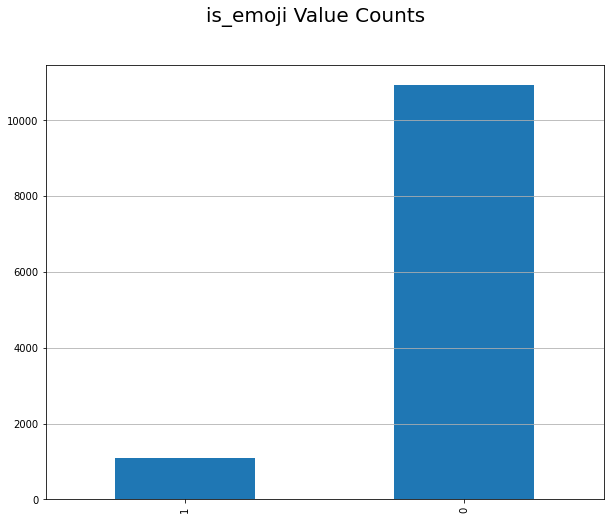

In [39]:
plt.figure(figsize=(10,8))
ax = raw_data['is_emoji'].value_counts().sort_values().plot(kind="bar")
ax.grid(axis="y")
plt.suptitle("is_emoji Value Counts", fontsize=20)
plt.show()

In [40]:
raw_data['is_link'] = 0
for i in range(len(raw_data)):
  if "https" in raw_data.Texts[i]:
    raw_data['is_link'][i]=1 

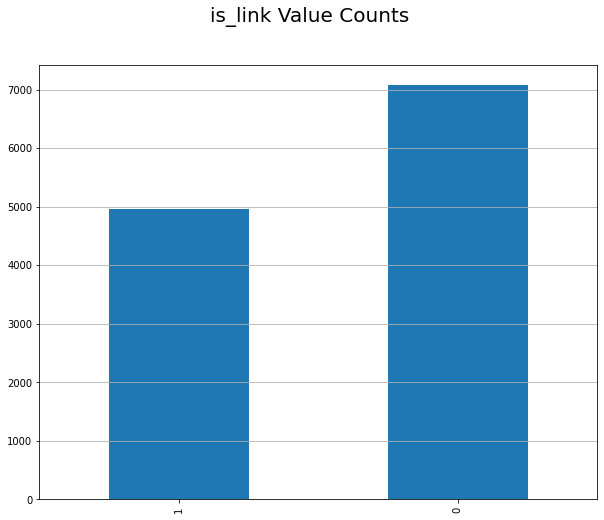

In [41]:
plt.figure(figsize=(10,8))
ax = raw_data['is_link'].value_counts().sort_values().plot(kind="bar")
ax.grid(axis="y")
plt.suptitle("is_link Value Counts", fontsize=20)
plt.show()

In [42]:
from collections import Counter

raw_data['hashtag'] = 0
for i in range(len(raw_data)):
  for hast_tag in re.findall('#(\w+)', raw_data.Texts[i]):
    raw_data['hashtag'] += 1

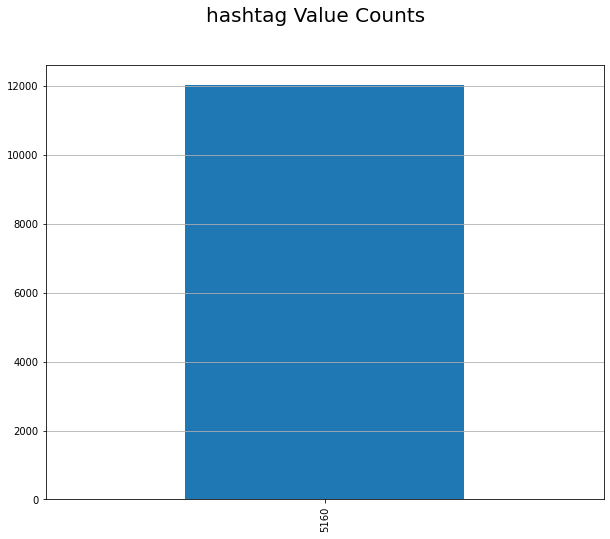

In [43]:
plt.figure(figsize=(10,8))
ax = raw_data['hashtag'].value_counts().sort_values(ascending=False).plot(kind="bar")
ax.grid(axis="y")
plt.suptitle("hashtag Value Counts", fontsize=20)
plt.show()

(array([0]), <a list of 1 Text major ticklabel objects>)

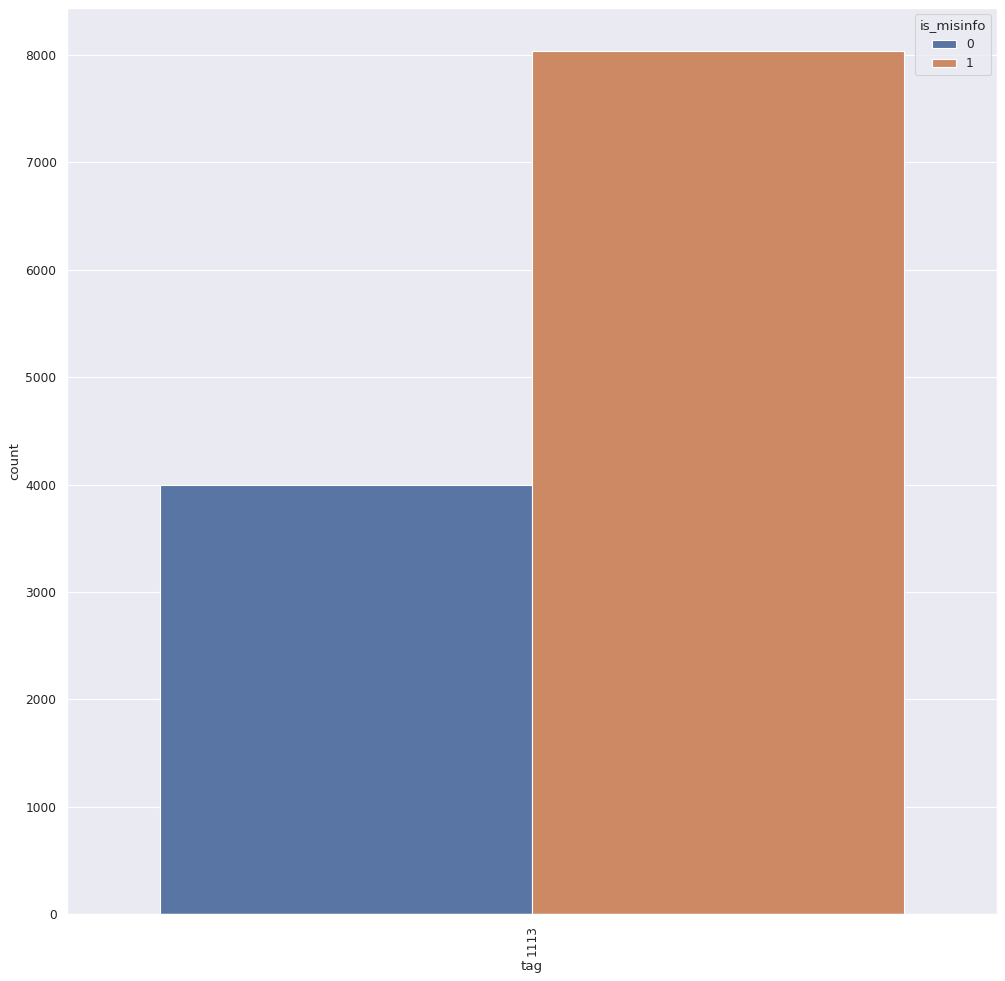

In [44]:
raw_data['tag'] = 0
for i in range(len(raw_data)):
  for tag in re.findall('@(\w+)', raw_data.Texts[i]):
    raw_data['tag'] += 1

sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 15), dpi=80)
ax = sns.countplot(x=raw_data['tag'], data=raw_data,hue='is_misinfo',order = raw_data['tag'].value_counts().index)
plt.xticks(rotation=90)

In [45]:
raw_data.iloc[7]

id                                                  1,37407E+18
is_misinfo                                                    0
Texts         The moment I get the vaccine Im outta here <U...
clean_text    the moment i get the vaccin im outta here u uf...
word_count                                                   10
is_emoji                                                      1
is_link                                                       0
hashtag                                                    5160
tag                                                        1113
Name: 7, dtype: object

## 4.2. Vectorization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate vectorizer
vectorizer = CountVectorizer()
# Fit the vectorizer (on the full dataset) (="Word of bags") and transform into document term matrix (="Word embedding")
clean_text_docmatrix = vectorizer.fit_transform(raw_data["clean_text"])
# Transform the document term matrix into a dataframe
docmatrix_arrayed = clean_text_docmatrix.toarray() 
columns = vectorizer.get_feature_names()
docmatrix_df = pd.DataFrame(docmatrix_arrayed, columns=columns)
docmatrix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12027 entries, 0 to 12026
Columns: 13231 entries, aa to zzzzzzzz
dtypes: int64(13231)
memory usage: 1.2 GB


In [47]:
# Concatenate the word embedding to the emoji, url, hashtag and tag features 
data = pd.concat([docmatrix_df, raw_data['is_emoji'], raw_data['is_link'], raw_data['hashtag'], raw_data['tag']], axis=1)
data.head()


,aa,aaaa,aaaaahhhhh,aadhaar,aajtak,aaocjrnzb,aarogya,aarogyasetu,aaron,aarp,aav,ab,abandon,abc,abcnew,abcnewsbayarea,abcsydney,abdullah,abfrzzwp,abhealth,abhiandniyu,abhorr,abid,abil,abinashvirkmd,abirballan,abizagrcuo,abject,abjectfailur,abjezo,abl,abli,abneg,abnorm,abomin,abort,aboubacar,about,aboutkp,abov,...,zknrgdedg,zktysvpd,zn,znzzibfrp,zodiac,zombi,zombieland,zona,zone,zoobear,zoom,zoot,zphypvegm,zplwqgnyf,zpsvvaoqzv,zpujlfvk,zpwogir,zrkyumic,zrtjn,zrzfgeijd,zswrwezm,ztvabdsnsm,zuma,zumprtk,zunjnmdb,zuvshdpdfl,zvgnirnsk,zvkkspqzs,zxiienhc,zxrrfnsg,zxtmfmqgoh,zxtuuehnf,zybkbxxdyp,zzafnawgfz,zzndda,zzzzzzzz,is_emoji,is_link,hashtag,tag
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5160,1113
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5160,1113
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5160,1113
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5160,1113
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5160,1113


In [48]:
# WHAT IS THIS CAN I REMOVE ???

# # # Vectorize text
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# X_train_ML = vectorizer.fit_transform(X_train_ML) # Learn the vocabulary dictionary and return document-term matrix.
# X_test_ML = vectorizer.transform(X_test_ML) # Transform documents to document-term matrix.

## 5. Model Estimation

### 5.1. ML model evaluation function: cross validation

In [49]:
def cross_validate_clf(clf, features, labels, k=10):
  
  from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
  
  scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

  kfold = model_selection.KFold(n_splits=k, random_state=42, shuffle=True)
  
  results = model_selection.cross_validate(estimator=clf,
                                          X=features,
                                          y=labels,
                                          cv=kfold,
                                          scoring=scoring)
  
  print ("testing accuracy: {}".format(np.mean(results['test_accuracy'])))
  print ("precision: {}".format(np.mean(results['test_precision'])))
  print ("recall:    {}".format(np.mean(results['test_recall'])))
  print ("f1_score:    {}".format(np.mean(results['test_f1_score'])))
  return [np.mean(results['test_accuracy']),np.mean(results['test_precision']),np.mean(results['test_recall']),np.mean(results['test_f1_score'])]

### 5.2. Train ML models

In [50]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()


In [51]:
X_train, X_test,y_train, y_test = model_selection.train_test_split(data,
                                                                   raw_data['is_misinfo'],
                                                                   test_size=0.3,
                                                                   random_state=0, 
                                                                   shuffle=True)

In [52]:
log_clf = LogisticRegression().fit(X=X_train,y=y_train)

In [ ]:
log_clf_scores = cross_validate_clf(log_clf, data, raw_data['is_misinfo'])

In [ ]:
#predictions_train = log_clf.predict(features_train)
predictions = log_clf.predict(X_test)

In [ ]:
text_test = 'Urgent: Doctor Warns The Experimental COVID \x93Vaccine\x94 Is Really \x93Dangerous Gene Therapy\x94\r\nhttps://t.co/TWAxtJM3gt'
s1 = ''
s2 = ''
s3 = ''
s4 = ''
s5 = ''

In [ ]:
sentence_list = [s1, s2, s3, s4, s5]
counter = 1
for s in sentence_list: 
  out = log_clf.predict(new_text_input(s))
  print('Our prediction is: ', out)


In [ ]:
out=log_clf.predict(new_text_input(sentence1))

In [ ]:
print('Our prediction is: ', out)

In [ ]:
# n = np.array([news]).reshape(1,-1)
# log_clf.predict(new_text_input('vaciine #free @varesse'))
new_text_input('vaciine #free @varesse')

In [ ]:
# RANDOM FOREST
rf_clf = RandomForestClassifier() # n_jobs = -1, random_state = 42
rf_clf_scores = cross_validate_clf(rf_clf, data, raw_data['is_misinfo'])

In [ ]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf_scores = cross_validate_clf(dt_clf, data, raw_data['is_misinfo'])

In [ ]:
# GRADIENT BOOSTING
from sklearn.ensemble  import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf_scores = cross_validate_clf(gb_clf, data, raw_data['is_misinfo'])

In [ ]:
# ADABOOSTING 
from sklearn.ensemble import AdaBoostClassifier
adc_clf = AdaBoostClassifier(random_state=42)
adc_clf_scores = cross_validate_clf(adc_clf, data, raw_data['is_misinfo'])

In [ ]:
# SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
s_clf = SVC()
s_clf_scores = cross_validate_clf(s_clf, data, raw_data['is_misinfo'])

### 5.3. Hyperparameter tuning for the most promising model

In [ ]:
# Additional imports
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Grid search Logistic regression
# define models and parameters
model_to_tune = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear'] #  # ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
grid_search = GridSearchCV(estimator=model_to_tune, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(f1_score),error_score=0)
grid_result = grid_search.fit(data, raw_data['is_misinfo'])

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
#IMPROVED LOGISTIC REGRESSION FIT
log_clf = LogisticRegression()
log_clf_scores = cross_validate_clf(log_clf, data, raw_data['is_misinfo'])

LSTM model with 2 hidden layers

In [ ]:
# !wget -cq http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
# Define parameters
# path_to_glove_file = '/work/glove.6B.300d.txt' # download link: http://nlp.stanford.edu/data/glove.6B.zip
embedding_dim = 300
learning_rate = 1e-3
batch_size = 32
epochs = 10
sequence_len = 100

In [ ]:
#now you have the compressed data uploaded to your Colab, unzip it using the following command line:
import zipfile

zip_ref = zipfile.ZipFile("/work/glove.6B.zip", 'r')

zip_ref.extractall()
zip_ref.close()

In [ ]:
# split in train and test data
# split train and test
X_train, X_test,y_train, y_test = model_selection.train_test_split(raw_data['clean_text'],
                                                                   raw_data['is_misinfo'],
                                                                   test_size=0.3,
                                                                   random_state=0, 
                                                                   shuffle=True)

In [ ]:
# Define train and test labels
y_train_LSTM= y_train.values.reshape(-1,1)
y_test_LSTM = y_test.values.reshape(-1,1)

In [ ]:
# Tokenize train data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print("Vocabulary Size: ", vocab_size)

In [ ]:
# Pad train and test 
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=sequence_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=sequence_len)

print("Training X shape: ", X_train.shape)
print("Testing X shape: ", X_test.shape)

In [ ]:
# Read word embeddings
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

In [ ]:
# Define embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
embedding_matrix

In [ ]:

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, SimpleRNN, LSTM, Activation
import tensorflow as tf 

In [ ]:
# Build and compile the model: 2 hidden layers
# 9377
# 6000
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            embedding_dim,
                                            weights=[embedding_matrix],
                                            input_length=sequence_len,
                                            trainable=False)
model2 = Sequential() # True
model2.add(embedding_layer)
model2.add(LSTM(128, return_sequences=True, dropout=0.5, recurrent_dropout=0.2))
model2.add(LSTM(128, return_sequences=False, dropout=0.5, recurrent_dropout=0.2)) ##evtl behalten

model2.add(Dropout(rate=0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()



In [ ]:
# compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# ,f1_m,precision_m, recall_m

In [ ]:
# Train the LSTM Model
history = model2.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_data=(X_test, y_test))

In [ ]:
#Evaluate the model
predicted = model2.predict(X_test, verbose=1, batch_size=10000)

y_predicted = [1 if each > 0.5 else 0 for each in predicted]

score, test_accuracy = model2.evaluate(X_test, y_test, batch_size=10000)

print("Test Accuracy: ", test_accuracy)
print(metrics.classification_report(list(y_test), y_predicted))

## 6. Model Performance

In [ ]:
lst_scores = [rf_clf_scores, dt_clf_scores, gb_clf_scores, adc_clf_scores, s_clf_scores, log_clf_scores]

df_scores = pd.DataFrame(lst_scores, columns =['Accuracy', 'Precision', 'Recall', 'F1 Score'],index=[
    "Random Forest",
    "Decisions Tree",
    "Gradient Boosting Classifier",
    "Adaboost Classifier",
    "Support Vector Machine Classifier",
    "Logistic Regression"
])

df_scores=df_scores.round(2)
df_scores

def color_results_green(val):
    color = 'green' if val >= 0.48 else 'black'
    return 'color: %s' % color

In [ ]:
def color_results_green(val):
    color = 'green' if val >= 0.48 else 'black'
    return 'color: %s' % color

d = dict.fromkeys(df_scores.select_dtypes('float').columns, "{:.2}")
df_scores.style.applymap(color_results_green, subset=pd.IndexSlice[:, ['Precision', 'Recall']]).format(d)

In [ ]:
x = np.array(["fuck this vaccine",raw_data.Texts[2]]).reshape(1, -1)
adc_clf.predict(x)

In [ ]:
model3.predict(["fuck this vaccine",raw_data.Texts[2]])

In [ ]:
import joblib
joblib.dump(log_clf, 'fff.pkl')

In [ ]:
joblib.dump(model3, "./random_forest.joblib")

In [ ]:
loaded_rf = joblib.load("./random_forest.joblib")

In [ ]:
def new_text_input(new_text,raw_data=raw_data):
    emoji_exist = 0
    link_exist = 0
    hashtag_exist = 0
    tag_exist = 0
    
    if "<U+" in new_text:
        emoji_exist = 1
    
    if "https" in new_text:
        link_exist = 1

    for hast_tag in re.findall('#(\w+)', new_text):
        hashtag_exist += 1
    
    for tag in re.findall('@(\w+)', new_text):
        tag_exist += 1

    vectorizer = CountVectorizer()
    clean_text_docmatrix = vectorizer.fit_transform(raw_data["clean_text"])

    # Fit the vectorizer (on the full dataset) (="Word of bags") and transform into document term matrix (="Word embedding")
    clean_text_docmatrix = vectorizer.transform([new_text])
    # Transform the document term matrix into a dataframe
    docmatrix_arrayed = clean_text_docmatrix.toarray() 
    columns = vectorizer.get_feature_names()
    docmatrix_df = pd.DataFrame(docmatrix_arrayed, columns=columns)
    # .values.tolist ()

    # docmatrix_df = np.array([docmatrix_df]).reshape(1,-1)
    docmatrix_df = pd.concat([docmatrix_df, pd.Series(emoji_exist) , pd.Series(link_exist), pd.Series(hashtag_exist), pd.Series(tag_exist)], axis=1)
    # docmatrix_df = np.array([docmatrix_df, emoji_exist, link_exist, hashtag_exist, tag_exist]).reshape(1,-1)
    return docmatrix_df
    # DataFrame
log_clf.predict(new_text_input('Urgent: Doctor Warns The Experimental COVID \x93Vaccine\x94 Is Really \x93Dangerous Gene Therapy\x94\r\nhttps://t.co/TWAxtJM3gt'))


In [ ]:
def new_text_input(new_text,raw_data=raw_data):
    emoji_exist = 0
    link_exist = 0
    hashtag_exist = 0
    tag_exist = 0
    
    if "<U+" in new_text:
        emoji_exist = 1
    
    if "https" in new_text:
        link_exist = 1

    for hast_tag in re.findall('#(\w+)', new_text):
        hashtag_exist += 1
    
    for tag in re.findall('@(\w+)', new_text):
        tag_exist += 1

    vectorizer = CountVectorizer()
    clean_text_docmatrix = vectorizer.fit_transform(raw_data["clean_text"])

    # Fit the vectorizer (on the full dataset) (="Word of bags") and transform into document term matrix (="Word embedding")
    clean_text_docmatrix = vectorizer.transform([new_text])
    # Transform the document term matrix into a dataframe
    docmatrix_arrayed = clean_text_docmatrix.toarray() 
    columns = vectorizer.get_feature_names()
    docmatrix_df = pd.DataFrame(docmatrix_arrayed, columns=columns)
    # .values.tolist ()

    # docmatrix_df = np.array([docmatrix_df]).reshape(1,-1)
    docmatrix_df = pd.concat([docmatrix_df, pd.Series(emoji_exist) , pd.Series(link_exist), pd.Series(hashtag_exist), pd.Series(tag_exist)], axis=1)
    # docmatrix_df = np.array([docmatrix_df, emoji_exist, link_exist, hashtag_exist, tag_exist]).reshape(1,-1)
    return docmatrix_df
    # DataFrame
log_clf.predict(new_text_input('Urgent: Doctor Warns The Experimental COVID \x93Vaccine\x94 Is Really \x93Dangerous Gene Therapy\x94\r\nhttps://t.co/TWAxtJM3gt'))


In [ ]:
loaded_rf.predict(["let's get vaccine"])

In [ ]:
loaded_rf.predict(['fuck your vaccine',"dont test this vaccine on us",'so excited i got my vaccine','i really doubt 2021 will be much different imo because corona will probably ruin it, so im not too'])

In [ ]:
joblib.dump(s_clf, "./s_clf.joblib")

In [ ]:
loaded_rf = joblib.load("./s_clf.joblib")

In [ ]:
loaded_rf.predict(['fuck your vaccine',"dont test this vaccine on us",'so excited i got my vaccine','i really doubt 2021 will be much different imo because corona will probably ruin it, so im not too'])

In [ ]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
LR.fit(X_train_ML, y_train)
DT.fit(X_train_ML, y_train)
GBC.fit(X_train_ML, y_train)
RFC.fit(X_train_ML, y_train)


In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean_text) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)


In [ ]:
# split train and test
X_train, X_test,y_train, y_test = model_selection.train_test_split(raw_data[feature],
                                                                   raw_data[label],
                                                                   test_size=0.3,
                                                                   random_state=42, 
                                                                   shuffle=True)
X_train_ML = X_train.values.reshape(-1)

news = str(input())
n = np.array([news]).reshape(1,-1)

vectorizer = CountVectorizer()
X_train_ML = vectorizer.fit_transform(X_train_ML) # Learn the vocabulary dictionary and return document-term matrix.
# X_test_ML = vectorizer.transform(X_test_ML) # Transform documents to document-term matrix.

tfidf = TfidfTransformer(norm='l2')
X_train_ML = tfidf.fit_transform(X_train_ML)
# X_test_ML = tfidf.transform(X_test_ML)
n = vectorizer.transform(n)
n = tfidf.transform(n)



adc_clf.predict(n)'''

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=35556358-4fb5-4561-89ec-f7dee09ee525' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>